In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
tqdm.pandas()

from astropy.coordinates import SkyCoord
import astropy.units as u

In [79]:
combine_fold = 'C:/Users/oryan/Documents/mergers-in-cosmos/cats-to-combine'
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/back-to-basics-data'
fig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures'
orig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/data'

## Getting the Data

In [80]:
df_cat = pd.read_csv(f'{combine_fold}/dor-all-restaged-full.csv', index_col = 0)
df_cat.head()

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ORyanID_23,ID,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,4000705532455,816891,stage4,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-0.000010,...,-8.931825,-8.911355,-8.899668,-8.883307,-8.872990,0.529107,0.560142,0.599624,0.630920,0.652330
1,4000705533383,860686,stage3,150.644522,2.237226,10047.978516,22713.351562,0.000051,0.000046,0.000002,...,-9.314209,-9.106611,-8.941274,-8.713107,-8.541205,0.341270,0.545498,0.732327,0.906665,1.020098
2,4000705539941,1301188,stage2,149.702462,2.654895,32637.949219,32737.013672,0.000064,0.000104,-0.000003,...,-9.794128,-9.784252,-9.766013,-9.743796,-9.727879,0.018737,0.018737,0.018737,0.018737,0.018737
3,4000705540034,1304538,stage3,149.726828,2.658172,32053.712891,32815.468750,0.000071,0.000086,-0.000006,...,-9.480532,-9.443615,-9.402433,-9.352081,-9.325659,0.302629,0.376027,0.440394,0.508153,0.567727
4,4000705540064,1310001,stage3,149.701230,2.660343,32667.441406,32867.789062,0.000026,0.000020,-0.000010,...,-9.882174,-9.855921,-9.816085,-9.697225,-9.573506,0.455258,0.482555,0.522239,0.600383,0.660279


In [81]:
df_cat.query('ORyanID_23 == 4000904738555')

,ORyanID_23,ID,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
2167,4000904738555,941520,stage2,149.716644,2.303715,32300.177734,24308.152344,0.000001,0.000001,-3.075653e-07,...,-13.543675,-13.523849,-11.370284,-10.886877,-10.73199,0.346563,0.424251,0.503699,0.592035,0.696499


In [6]:
or_sample = pd.read_csv(f'{orig_folder}/interacting-catalogue.csv', index_col = 0)
or_sample.head()

,SourceID,RA,Dec,int_prediction,references,status
0,4000704963129,187.983807,58.010524,0.958096,No_entry,Unreferenced
1,4000704963271,187.980323,58.026481,0.966350,No_entry,Unreferenced
2,4000704963422,187.938181,58.039949,0.956150,No_entry,Unreferenced
3,4000705131622,217.216271,34.015278,0.987888,No_entry,Unreferenced
4,4000705131630,217.207839,34.015576,0.984174,No_entry,Unreferenced


In [7]:
df_cat = pd.read_csv(f'{combine_fold}/dor-all-restaged-full.csv', index_col = 0)
df_cat.head()

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ORyanID_23,ID,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,4000705532455,816891,stage4,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-0.000010,...,-8.931825,-8.911355,-8.899668,-8.883307,-8.872990,0.529107,0.560142,0.599624,0.630920,0.652330
1,4000705533383,860686,stage3,150.644522,2.237226,10047.978516,22713.351562,0.000051,0.000046,0.000002,...,-9.314209,-9.106611,-8.941274,-8.713107,-8.541205,0.341270,0.545498,0.732327,0.906665,1.020098
2,4000705539941,1301188,stage2,149.702462,2.654895,32637.949219,32737.013672,0.000064,0.000104,-0.000003,...,-9.794128,-9.784252,-9.766013,-9.743796,-9.727879,0.018737,0.018737,0.018737,0.018737,0.018737
3,4000705540034,1304538,stage3,149.726828,2.658172,32053.712891,32815.468750,0.000071,0.000086,-0.000006,...,-9.480532,-9.443615,-9.402433,-9.352081,-9.325659,0.302629,0.376027,0.440394,0.508153,0.567727
4,4000705540064,1310001,stage3,149.701230,2.660343,32667.441406,32867.789062,0.000026,0.000020,-0.000010,...,-9.882174,-9.855921,-9.816085,-9.697225,-9.573506,0.455258,0.482555,0.522239,0.600383,0.660279


In [8]:
or_sample = pd.read_csv(f'{orig_folder}/interacting-catalogue.csv', index_col = 0)
or_sample.head()

,SourceID,RA,Dec,int_prediction,references,status
0,4000704963129,187.983807,58.010524,0.958096,No_entry,Unreferenced
1,4000704963271,187.980323,58.026481,0.966350,No_entry,Unreferenced
2,4000704963422,187.938181,58.039949,0.956150,No_entry,Unreferenced
3,4000705131622,217.216271,34.015278,0.987888,No_entry,Unreferenced
4,4000705131630,217.207839,34.015576,0.984174,No_entry,Unreferenced


## Conductiong Matching

In [9]:
df_cat_red = df_cat[['ORyanID_23','ID','ALPHA_J2000','DELTA_J2000']].rename(columns = {'ORyanID_23' : 'SourceID'})

In [10]:
df_merge = df_cat_red.merge(or_sample[['SourceID', 'RA', 'Dec']], on = 'SourceID', how = 'left').dropna()
df_merge.head()

,SourceID,ID,ALPHA_J2000,DELTA_J2000,RA,Dec
0,4000705532455,816891,150.679846,2.196543,150.679664,2.196615
1,4000705533383,860686,150.644522,2.237226,150.645125,2.237650
2,4000705539941,1301188,149.702462,2.654895,149.702652,2.654624
3,4000705540034,1304538,149.726828,2.658172,149.727017,2.658066
4,4000705540064,1310001,149.701230,2.660343,149.701495,2.660271


In [11]:
len(df_merge)

3072

In [12]:
df_merge.drop_duplicates('SourceID', keep = 'first')

,SourceID,ID,ALPHA_J2000,DELTA_J2000,RA,Dec
0,4000705532455,816891,150.679846,2.196543,150.679664,2.196615
1,4000705533383,860686,150.644522,2.237226,150.645125,2.237650
2,4000705539941,1301188,149.702462,2.654895,149.702652,2.654624
3,4000705540034,1304538,149.726828,2.658172,149.727017,2.658066
4,4000705540064,1310001,149.701230,2.660343,149.701495,2.660271
...,...,...,...,...,...,...
2560,4001111524196,991056,150.407247,2.356121,150.406927,2.355820
2561,4001185627710,1294479,149.998094,2.651083,149.997831,2.651329
2562,6000508613553,1140076,150.610964,2.494102,150.610729,2.494162
2563,6000518662663,575198,150.421018,1.984436,150.421572,1.985231


In [13]:
def calc_sep(cosmos_ra, cosmos_dec, ra, dec):
    coord_cosmos = SkyCoord(ra = cosmos_ra * u.deg, dec = cosmos_dec * u.deg, frame = 'fk5')
    coord = SkyCoord(ra = ra * u.deg, dec = dec * u.deg, frame = 'fk5')
    
    sep = coord_cosmos.separation(coord).to(u.arcsec)
    
    return sep.value

In [14]:
df_seps = (
    df_merge
    .assign(
        sep = df_merge.progress_apply(lambda row: calc_sep(row.ALPHA_J2000, row.DELTA_J2000, row.RA, row.Dec), axis = 1)
    )
)

100%|██████████| 3072/3072 [00:06<00:00, 442.69it/s]


In [15]:
df_seps_dedup = df_seps.sort_values('sep', ascending=True).drop_duplicates('SourceID', keep='first')

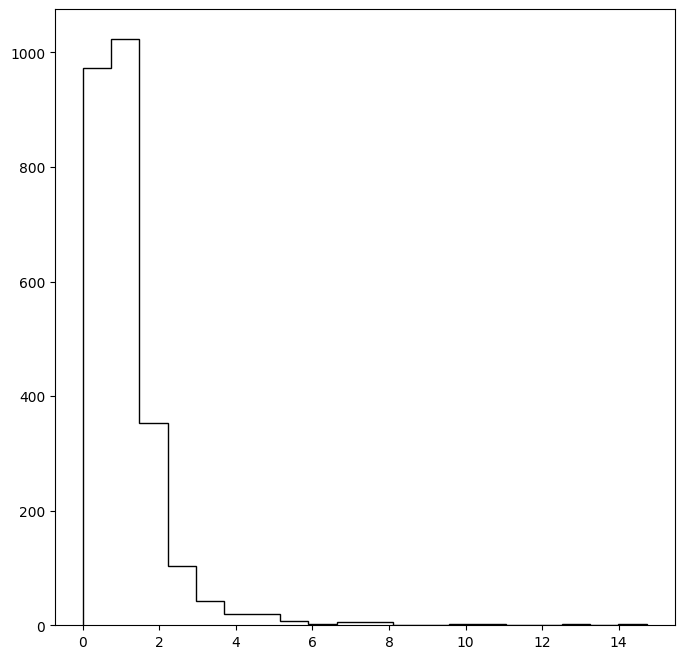

In [16]:
plt.figure(figsize = (8,8))
plt.hist(df_seps_dedup.sep, bins = 20, histtype = 'step', color = 'black')
plt.show()

## Checking Large Separations

In [17]:
df_vis_clsf = (
    pd.read_csv(f'{data_folder}/secondaries-identified.csv', index_col = 0)
    .reset_index()
    .rename(columns = {'index' : 'SourceID', '0' : 'vis_clsf'})
)
df_vis_clsf.head()

,SourceID,vis_clsf
0,4000705532455,n
1,4000705532984,nm
2,4000705533312,y
3,4000705533383,n
4,4000705539435,l


In [18]:
len(df_seps)

3072

In [19]:
df_seps_clsf = df_seps_dedup.merge(df_vis_clsf, on = 'SourceID', how = 'left')

In [35]:
df_rem = df_seps_clsf.query('sep > 3.5')

In [82]:
df_rem

,SourceID,ID,ALPHA_J2000,DELTA_J2000,RA,Dec,sep,vis_clsf
2538,4000904738555,941520,149.716644,2.303715,149.717503,2.302396,5.667723,y


In [21]:
df_seps_clsf.vis_clsf.value_counts()

n    1802
y     649
b     113
m       1
Name: vis_clsf, dtype: int64

In [22]:
res = ['n','y','b']
color = ['black','blue','red']

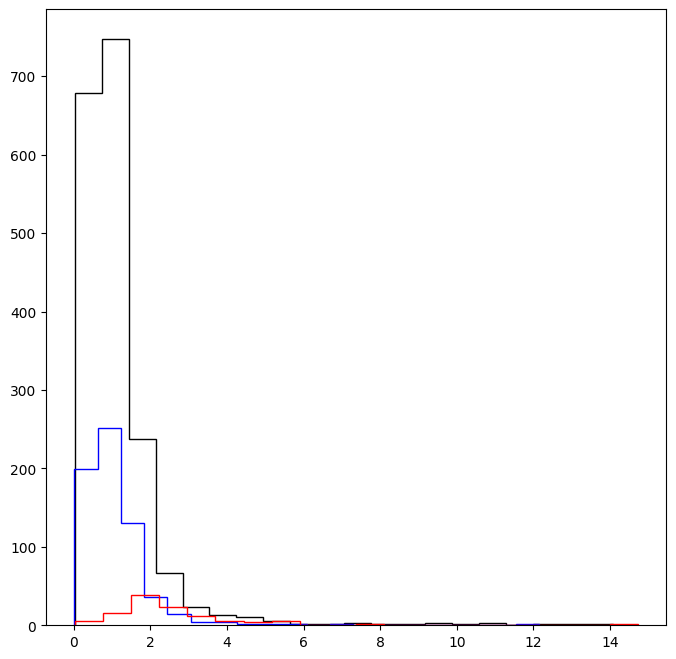

In [23]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,8))
for counter, i in enumerate(res):
    df_tmp = df_seps_clsf.query('vis_clsf == @i')
    ax.hist(df_tmp.sep, bins = 20, histtype = 'step', color = color[counter])
plt.show()

In [37]:
sources_rem = list(df_rem.SourceID)

## Removing Bad Sources

In [38]:
df_cat

,ORyanID_23,ID,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,4000705532455,816891,stage4,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-1.043282e-05,...,-8.931825,-8.911355,-8.899668,-8.883307,-8.872990,0.529107,0.560142,0.599624,0.630920,0.652330
1,4000705533383,860686,stage3,150.644522,2.237226,10047.978516,22713.351562,0.000051,0.000046,1.571297e-06,...,-9.314209,-9.106611,-8.941274,-8.713107,-8.541205,0.341270,0.545498,0.732327,0.906665,1.020098
2,4000705539941,1301188,stage2,149.702462,2.654895,32637.949219,32737.013672,0.000064,0.000104,-2.881107e-06,...,-9.794128,-9.784252,-9.766013,-9.743796,-9.727879,0.018737,0.018737,0.018737,0.018737,0.018737
3,4000705540034,1304538,stage3,149.726828,2.658172,32053.712891,32815.468750,0.000071,0.000086,-6.036952e-06,...,-9.480532,-9.443615,-9.402433,-9.352081,-9.325659,0.302629,0.376027,0.440394,0.508153,0.567727
4,4000705540064,1310001,stage3,149.701230,2.660343,32667.441406,32867.789062,0.000026,0.000020,-1.023530e-05,...,-9.882174,-9.855921,-9.816085,-9.697225,-9.573506,0.455258,0.482555,0.522239,0.600383,0.660279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176,4001204758614_extra,1520733,stage4,149.891374,2.866981,28107.876953,37826.437500,0.000086,0.000104,-9.313976e-07,...,-9.441206,-9.279022,-9.095134,-9.003501,-8.955496,0.120441,0.213251,0.306832,0.556012,0.731876
4177,4546055995_extra,1520749,stage2,150.383110,2.865367,16320.103516,37787.917969,0.000131,0.000236,7.123858e-05,...,-9.857880,-9.658215,-9.485625,-9.235816,-8.971795,0.162147,0.238640,0.432004,0.592193,0.687256
4178,4000927318133_extra,1523385,stage3,149.789910,2.865132,30540.179688,37782.648438,0.000045,0.000059,1.600747e-05,...,-9.525900,-9.472779,-9.353454,-9.273221,-9.213521,0.262676,0.355466,0.410356,0.489105,0.566003
4179,4000747939904_extra,1524909,stage3,150.450581,2.872371,14702.710938,37956.468750,0.000248,0.000292,7.378556e-06,...,-9.556987,-9.385500,-9.154130,-9.026810,-8.938077,0.153294,0.283249,0.436332,0.600615,0.693621


In [73]:
df_seps_clsf.query('SourceID == 4000904738555')

,SourceID,ID,ALPHA_J2000,DELTA_J2000,RA,Dec,sep,vis_clsf
2538,4000904738555,941520,149.716644,2.303715,149.717503,2.302396,5.667723,y


In [96]:
def remove_func(sourceid, sources_rem, df):
    
    if type(sourceid) == str:
        if '_extra' in sourceid:
            return 'n'
        sourceid = int(sourceid)
    
    row = df.query('SourceID == @sourceid')
    if len(row) > 0:
        vis_clsf = row.vis_clsf.iloc[0]
        
        if vis_clsf == 'b':
            return 'n'
    
    if sourceid in sources_rem:
        return 'y'
    
    return 'n'

In [97]:
df_to_rem = (
    df_cat
    .assign(remove = df_cat.progress_apply(lambda row: remove_func(row.ORyanID_23, sources_rem, df_seps_clsf), axis = 1))
)

100%|██████████| 4181/4181 [00:06<00:00, 695.88it/s]


In [98]:
df_bad_seps = df_to_rem.query('remove == "n"').drop(columns = 'remove')

In [104]:
df_bad_seps

,ORyanID_23,ID,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,4000705532455,816891,stage4,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-1.043282e-05,...,-8.931825,-8.911355,-8.899668,-8.883307,-8.872990,0.529107,0.560142,0.599624,0.630920,0.652330
1,4000705533383,860686,stage3,150.644522,2.237226,10047.978516,22713.351562,0.000051,0.000046,1.571297e-06,...,-9.314209,-9.106611,-8.941274,-8.713107,-8.541205,0.341270,0.545498,0.732327,0.906665,1.020098
2,4000705539941,1301188,stage2,149.702462,2.654895,32637.949219,32737.013672,0.000064,0.000104,-2.881107e-06,...,-9.794128,-9.784252,-9.766013,-9.743796,-9.727879,0.018737,0.018737,0.018737,0.018737,0.018737
3,4000705540034,1304538,stage3,149.726828,2.658172,32053.712891,32815.468750,0.000071,0.000086,-6.036952e-06,...,-9.480532,-9.443615,-9.402433,-9.352081,-9.325659,0.302629,0.376027,0.440394,0.508153,0.567727
4,4000705540064,1310001,stage3,149.701230,2.660343,32667.441406,32867.789062,0.000026,0.000020,-1.023530e-05,...,-9.882174,-9.855921,-9.816085,-9.697225,-9.573506,0.455258,0.482555,0.522239,0.600383,0.660279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176,4001204758614_extra,1520733,stage4,149.891374,2.866981,28107.876953,37826.437500,0.000086,0.000104,-9.313976e-07,...,-9.441206,-9.279022,-9.095134,-9.003501,-8.955496,0.120441,0.213251,0.306832,0.556012,0.731876
4177,4546055995_extra,1520749,stage2,150.383110,2.865367,16320.103516,37787.917969,0.000131,0.000236,7.123858e-05,...,-9.857880,-9.658215,-9.485625,-9.235816,-8.971795,0.162147,0.238640,0.432004,0.592193,0.687256
4178,4000927318133_extra,1523385,stage3,149.789910,2.865132,30540.179688,37782.648438,0.000045,0.000059,1.600747e-05,...,-9.525900,-9.472779,-9.353454,-9.273221,-9.213521,0.262676,0.355466,0.410356,0.489105,0.566003
4179,4000747939904_extra,1524909,stage3,150.450581,2.872371,14702.710938,37956.468750,0.000248,0.000292,7.378556e-06,...,-9.556987,-9.385500,-9.154130,-9.026810,-8.938077,0.153294,0.283249,0.436332,0.600615,0.693621


In [100]:
df_bad_seps.query('ORyanID_23 == 4000904738555')

,ORyanID_23,ID,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975


In [101]:
df_bad_seps.to_csv(f'{combine_fold}/dor-all-restaged-full-rem-seps.csv')

In [103]:
df_bad_seps.query('ID == 945348')

,ORyanID_23,ID,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
